In [137]:
from keras.src.ops import normalize
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
import seaborn as sns
import math
from scipy import integrate
from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

plt.rcParams['figure.figsize'] = [15, 7]


In [138]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

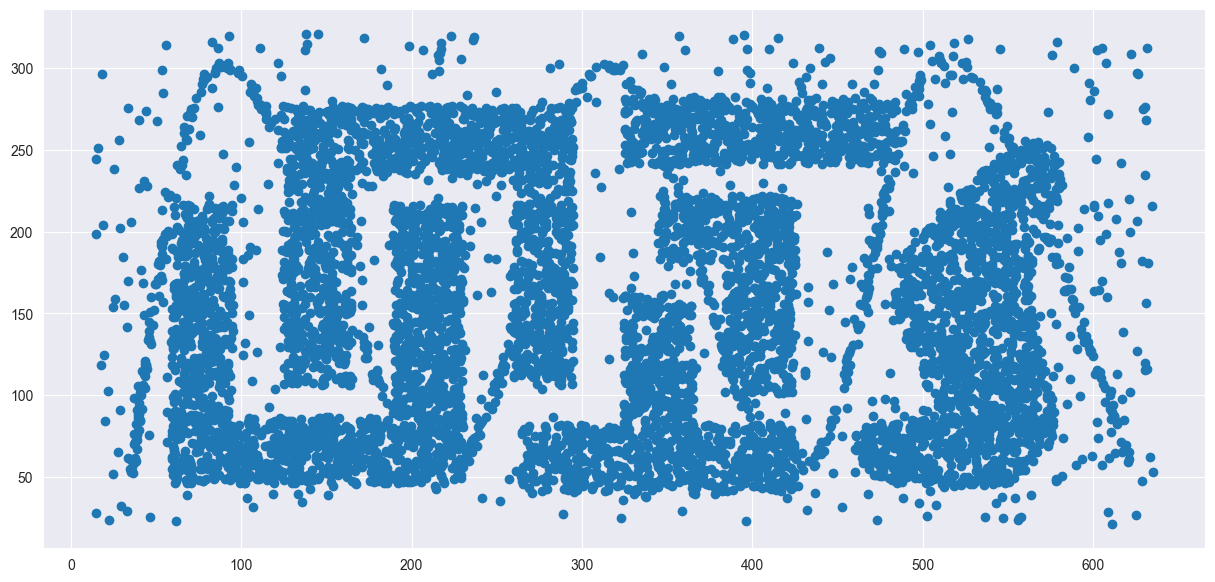

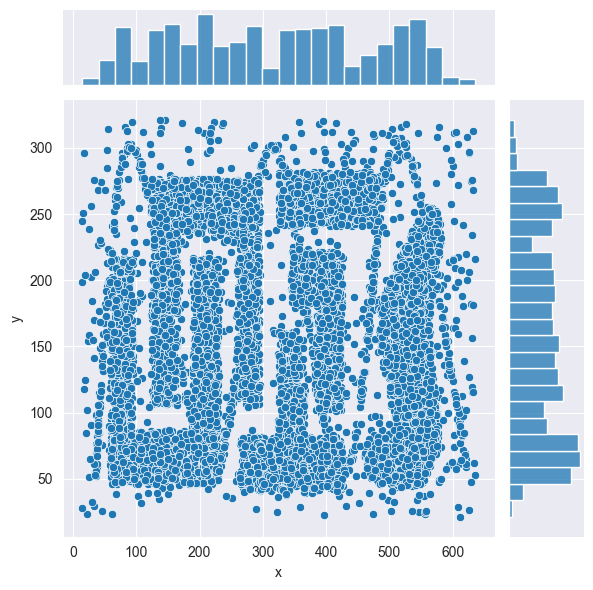

In [139]:
plt.scatter(df['x'],df['y'])
sns.jointplot(x=df['x'],y=df['y'],data=df)
plt.show()

In [140]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [141]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

0.11890279585089118


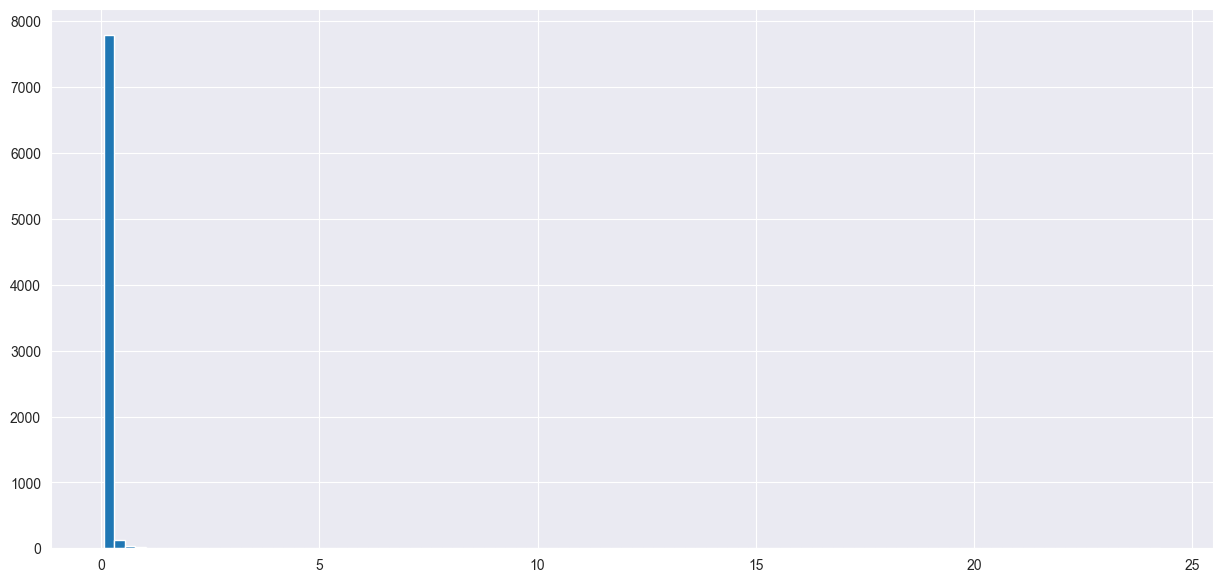

In [142]:
# exponential f(x) = lambda * e^(-lambda*x), allows for easier calculate d > 2.
pdfExp = np.array([])
arr = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
sizes = 100
x2 = np.linspace(min(arr) - 2, max(arr) + 2, sizes)
bandwidth = .5
for z in arr:
    total = 0
    for s in range(len(x2)):
        u = (s-z) / bandwidth
        total += 3*math.exp(-(3*u))
    total /= (sizes * (bandwidth ** 1))
    pdfExp = np.append(pdfExp,total)

maxer = np.max(pdfExp)*.0049
print(maxer)
outs = pdfExp <= maxer # confusing but outs is actually the inliners, this is because it is distance based and the farther away is safer
inlines = pdfExp > maxer
totalOuts = y[inlines]
plt.hist(pdfExp,bins=100)
plt.show()

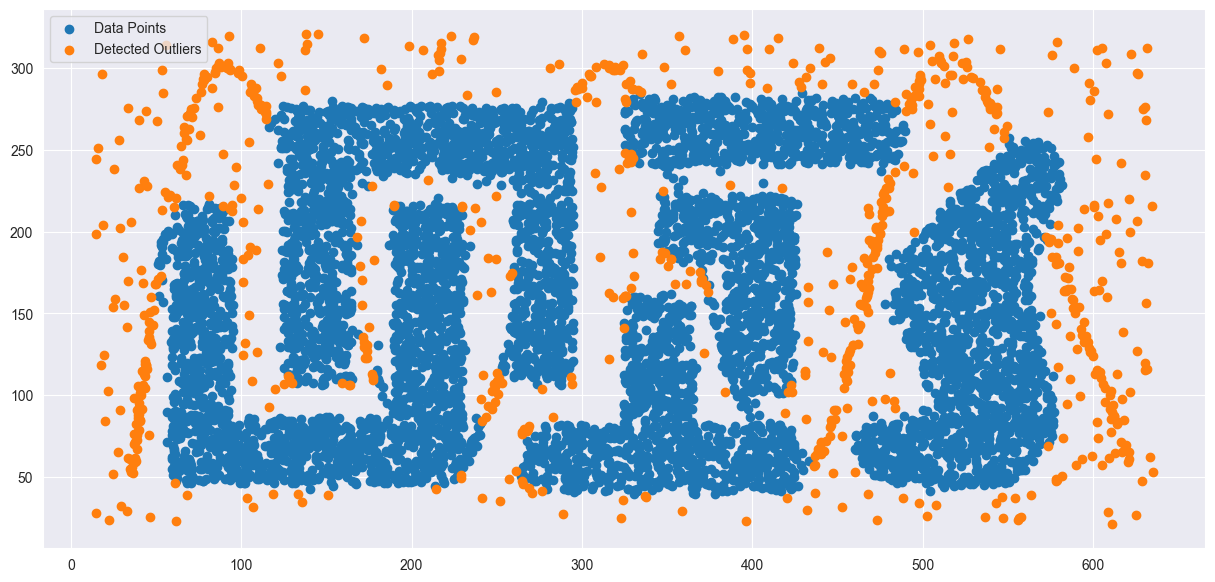

In [143]:
plt.scatter(X[outs,0],X[outs,1],label='Data Points')
plt.scatter(X[inlines,0],X[inlines,1],label='Detected Outliers')
plt.legend()
plt.show()

In [144]:
countOuts = 0
for s in totalOuts:
    if s == 6:
        countOuts += 1

print(countOuts,len(totalOuts))

676 765


In [145]:
df2 = pd.read_csv("./outlierDatasets/synthetic.csv")

In [146]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


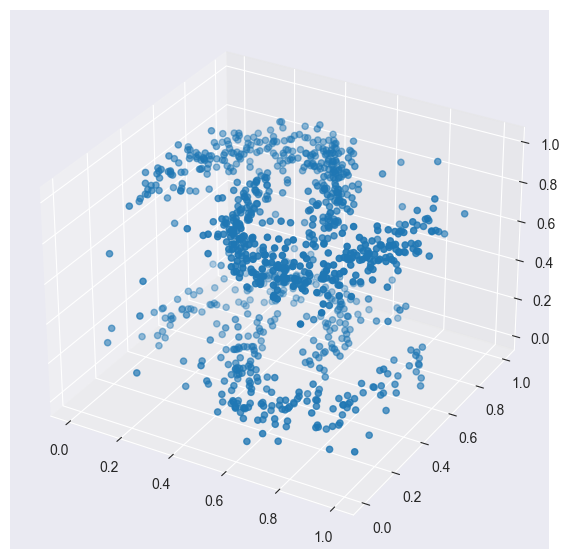

In [147]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df2.iloc[:,2],df2.iloc[:,3],df2.iloc[:,4])
plt.show()

In [148]:
X = df2.iloc[:,2:5].values
y = df2["outlier"].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,10)
print(y)

[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [149]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

0.22412991413622432
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1]


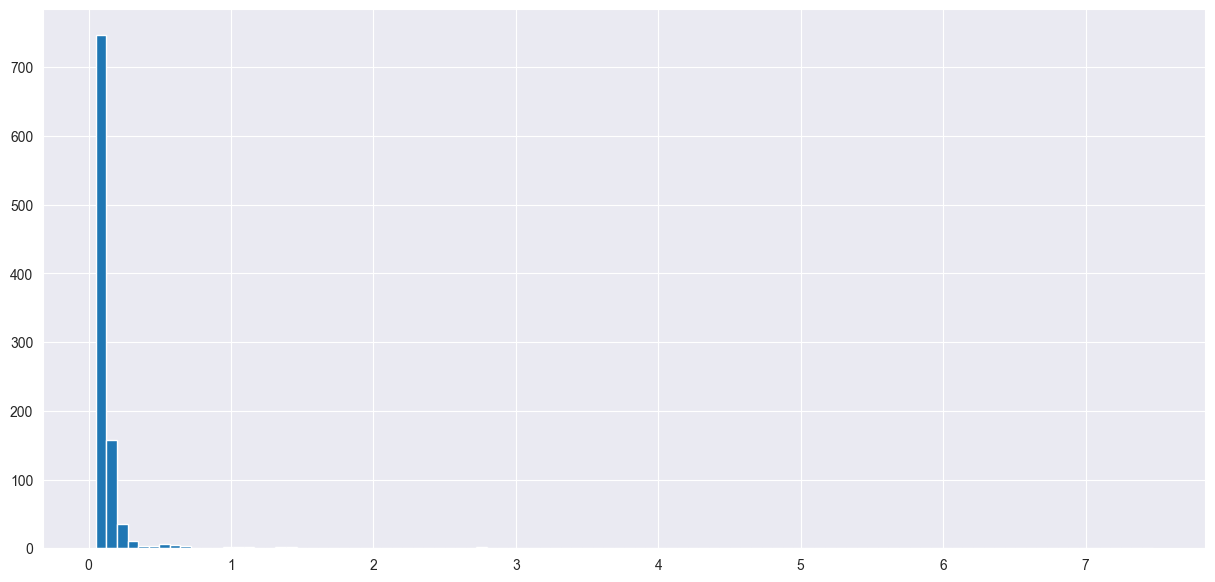

In [188]:
pdfExp = np.array([])
arr = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
sizes = 100
x2 = np.linspace(min(arr) - 2, max(arr) + 2, sizes)
bandwidth = 1
for z in arr:
    total = 0
    for s in range(len(x2)):
        u = (s-z) / bandwidth
        total += 5*math.exp(-(5*u))
    total /= (sizes * (bandwidth ** 1))
    pdfExp = np.append(pdfExp,total)

maxer = np.max(pdfExp)*.03
print(maxer)
outs = pdfExp <= maxer # confusing but outs is actually the inliners, this is because it is distance based and the farther away is safer
inlines = pdfExp > maxer
totalOuts = y[inlines]
print(totalOuts)
plt.hist(pdfExp,bins=100)
plt.show()

In [189]:
countOuts = 0
for s in totalOuts:
    if s == 1:
        countOuts += 1

print(countOuts,len(totalOuts))

58 79


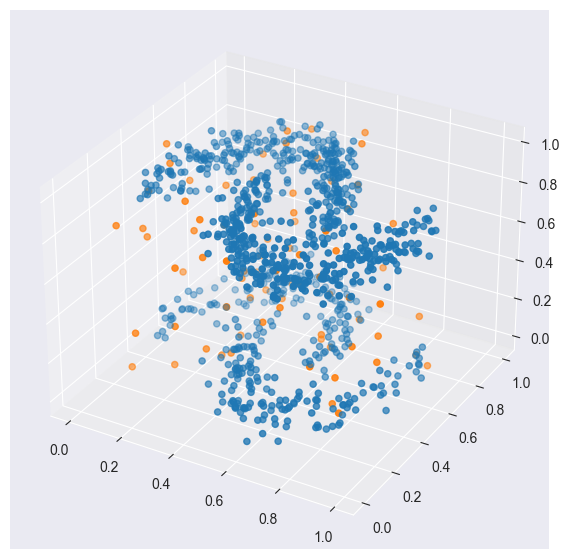

In [190]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df2.iloc[outs,2],df2.iloc[outs,3],df2.iloc[outs,4])
ax.scatter(df2.iloc[inlines,0],df2.iloc[inlines,1],df2.iloc[inlines,2])
plt.show()